In [ ]:
#|default_exp app

# Ball Recognizer


In [ ]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 985.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#!export
from fastai.vision.all import *
import gradio as gr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Work Station/Ball Recognizer

/content/drive/My Drive/Work Station/Ball Recognizer


In [ ]:
#!export
model_path = "models"
model = load_learner(f"{model_path}/ball-recognizer-v5.pkl")

In [ ]:
#!export
# ball_labels = ("soccer ball", "cricket ball", "basketball ball", "field hockey ball", "volleyball ball", "tennis ball", "rugby ball", "baseball ball", "table tennis ball", "american football ball", "golf ball", "handball ball", "pool ball", "water polo ball", "softball ball", "bocce ball", "bowling ball", "squash ball", "lacrosse ball", "wiffleball ball")
ball_labels = ('american football ball',
               'baseball ball',
               'basketball ball',
               'bocce ball',
               'bowling ball',
               'cricket ball',
               'field hockey ball',
               'golf ball',
               'handball ball',
               'lacrosse ball',
               'pool ball',
               'rugby ball',
               'soccer ball',
               'softball ball',
               'squash ball',
               'table tennis ball',
               'tennis ball',
               'volleyball ball',
               'water polo ball',
               'wiffleball ball')

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  print(pred, idx, probs)
  return dict(zip(ball_labels, map(float, probs)))


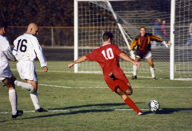

In [ ]:
from PIL import Image
img = PILImage.create(f'test_images/unknown_03.jpg')
img.thumbnail((192,192))
img

In [ ]:
recognize_image(img)

wiffleball ball TensorBase(19) TensorBase([2.1976e-03, 4.3396e-04, 6.2620e-04, 9.2595e-04, 1.0909e-05,
            8.5643e-05, 2.2378e-04, 1.2807e-04, 8.0045e-04, 1.1003e-04,
            5.6002e-05, 1.0690e-04, 4.9067e-04, 1.7528e-03, 4.9174e-05,
            1.7070e-04, 2.8111e-04, 2.4438e-04, 1.6666e-05, 9.9129e-01])


{'american football ball': 0.002197636291384697,
 'baseball ball': 0.0004339567094575614,
 'basketball ball': 0.0006262017413973808,
 'bocce ball': 0.0009259451180696487,
 'bowling ball': 1.0909352567978203e-05,
 'cricket ball': 8.56425758684054e-05,
 'field hockey ball': 0.00022378316498361528,
 'golf ball': 0.00012806791346520185,
 'handball ball': 0.0008004512055777013,
 'lacrosse ball': 0.00011003281542798504,
 'pool ball': 5.600194708677009e-05,
 'rugby ball': 0.00010690060298657045,
 'soccer ball': 0.0004906721296720207,
 'softball ball': 0.0017528320895507932,
 'squash ball': 4.917369005852379e-05,
 'table tennis ball': 0.00017069786554202437,
 'tennis ball': 0.00028110621497035027,
 'volleyball ball': 0.0002443788980599493,
 'water polo ball': 1.6666057490510866e-05,
 'wiffleball ball': 0.9912890195846558}

In [ ]:
#!export
image = gr.inputs.Image(shape = (192, 192))
label = gr.outputs.Label()
examples = [
    'test_images/unknown_00.jpg',
    'test_images/unknown_01.jpg',
    'test_images/unknown_02.jpg',
    'test_images/unknown_03.jpg',
    'test_images/unknown_04.jpg',
]

iface = gr.Interface(fn= recognize_image, inputs=image, outputs=label, examples = examples,  title = "Sports Ball Recognition App", description = "This app can recognize types of sports balls.")
iface.launch(inline = False, share = True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://72930440-13e9-4ee9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Notebook to Python Script

In [ ]:
!pip install --upgrade nbdev


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nbdev.export import notebook2script
notebook2script('app.ipynb')

ImportError: ignored